In this example I'm using MR_sample from the example scripts in RealTest to compare equity curves using Rusell 2000 vs Rusell 3000 constituents

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#set strategy name you want to filter by
strategy = 'mr_long'

#import realtime trades csv
dfa = pd.read_csv(r'your file location here',
                   usecols = [ 'Strategy', 'Symbol', 'DateIn','Profit','DateOut'], parse_dates=True)

#set dateout as date to sort by dates
dfa.DateOut = pd.to_datetime(dfa.DateOut)
dfa = dfa.sort_values(by='DateOut', ascending=True)
dfa

,Strategy,Symbol,DateIn,DateOut,Profit
0,mr_long,NFLX,1/5/10,2010-01-07,$2824.84
1,mr_long,NTRI-201903,1/5/10,2010-01-07,($3560.72)
2,mr_short,LAZ,1/4/10,2010-01-07,($5030.84)
3,mr_short,CAAS,1/5/10,2010-01-07,($6379.51)
4,mr_short,FSYS-201606,1/5/10,2010-01-07,$1115.26
...,...,...,...,...,...
7833,mr_short,MAXN,11/25/20,2020-12-01,($227977.20)
7832,mr_short,GRWG,11/24/20,2020-12-01,($246076.87)
7831,mr_short,NOVA,11/23/20,2020-12-01,($311219.37)
7834,mr_short,MSTR,12/1/20,2020-12-01,$242223.59


In [365]:
#import model trades csv
dfm = pd.read_csv(r'your file location here',
                   usecols = [ 'Strategy', 'Symbol', 'DateIn','Profit','DateOut'], parse_dates=True)

#set dateout as date to sort dates
dfm.DateOut=pd.to_datetime(dfm.DateOut)
dfm = dfm.sort_values(by='DateOut', ascending=True)
dfm

,Strategy,Symbol,DateIn,DateOut,Profit
0,mr_long,NTRI-201903,1/5/10,2010-01-07,($3574.22)
1,mr_short,HRBN-201111,1/5/10,2010-01-07,($5690.88)
2,mr_short,CAAS,1/5/10,2010-01-07,($6403.07)
3,mr_short,FSYS-201606,1/5/10,2010-01-07,$1119.63
4,mr_short,GNKOQ-201407,1/5/10,2010-01-07,$2944.42
...,...,...,...,...,...
6763,mr_short,MAXN,11/25/20,2020-12-01,($107215.44)
6762,mr_short,GRWG,11/24/20,2020-12-01,($115858.51)
6761,mr_short,NOVA,11/23/20,2020-12-01,($144532.55)
6764,mr_short,MSTR,12/1/20,2020-12-01,$112762.72


In [366]:
#clean profit column to convert to float
dfa['Profit'] = dfa['Profit'].replace({'\$':'','\(':'-','\)':''}, regex = True)
dfa['Profit'] = dfa['Profit'].astype(str).astype(float)

#filter dataframe to only contain desired strategy being analysed
dfa = dfa.loc[dfa['Strategy'] == strategy]

dfa.head(5)


,Strategy,Symbol,DateIn,DateOut,Profit
0,mr_long,NFLX,1/5/10,2010-01-07,2824.84
1,mr_long,NTRI-201903,1/5/10,2010-01-07,-3560.72
6,mr_long,HIW,1/5/10,2010-01-08,-341.06
7,mr_long,SLG,1/5/10,2010-01-08,789.41
8,mr_long,GTIV-201502,1/6/10,2010-01-08,624.74


In [367]:
#same for model trades
dfm['Profit'] = dfm['Profit'].replace({'\$':'','\(':'-','\)':''}, regex = True)
dfm['Profit'] = dfm['Profit'].astype(str).astype(float)

#filter
dfm = dfm.loc[dfm['Strategy'] == strategy]

dfm.head(5)


,Strategy,Symbol,DateIn,DateOut,Profit
0,mr_long,NTRI-201903,1/5/10,2010-01-07,-3574.22
5,mr_long,HIW,1/5/10,2010-01-08,-342.37
6,mr_long,GTIV-201502,1/6/10,2010-01-08,623.75
8,mr_long,ARCB,1/4/10,2010-01-11,-594.07
17,mr_long,MED,1/11/10,2010-01-13,-9730.42


In [368]:
#create new dataframe to aggregate profit per day and create equity curve column 
equity_curve = dfa[['DateOut', 'Profit']].copy()
equity_curve.index = pd.to_datetime(equity_curve.DateOut)

#resample columns to daily rows and sum data within
equity_curve = equity_curve.resample('D').sum()
equity_curve['EQ-Actual'] = equity_curve['Profit'].cumsum(axis = 0)

#create dataframe from model profit column and resample
dfm_eq = dfm[['DateOut', 'Profit']].copy()
dfm_eq.index = pd.to_datetime(dfm_eq.DateOut)
dfm_eq = dfm_eq.resample('D').sum()
#create equity curve
equity_curve['EQ-Model'] = dfm_eq['Profit'].cumsum(axis=0)
#add to equity curve dataframe
equity_curve['ProfitM'] = dfm_eq['Profit']


equity_curve

,Profit,EQ-Actual,EQ-Model,ProfitM
DateOut,,,,
2010-01-07,-735.88,-735.88,-3574.22,-3574.22
2010-01-08,1073.09,337.21,-3292.84,281.38
2010-01-09,0.00,337.21,-3292.84,0.00
2010-01-10,0.00,337.21,-3292.84,0.00
2010-01-11,-594.07,-256.86,-3886.91,-594.07
...,...,...,...,...
2020-11-27,0.00,17773279.43,8434760.79,0.00
2020-11-28,0.00,17773279.43,8434760.79,0.00
2020-11-29,0.00,17773279.43,8434760.79,0.00


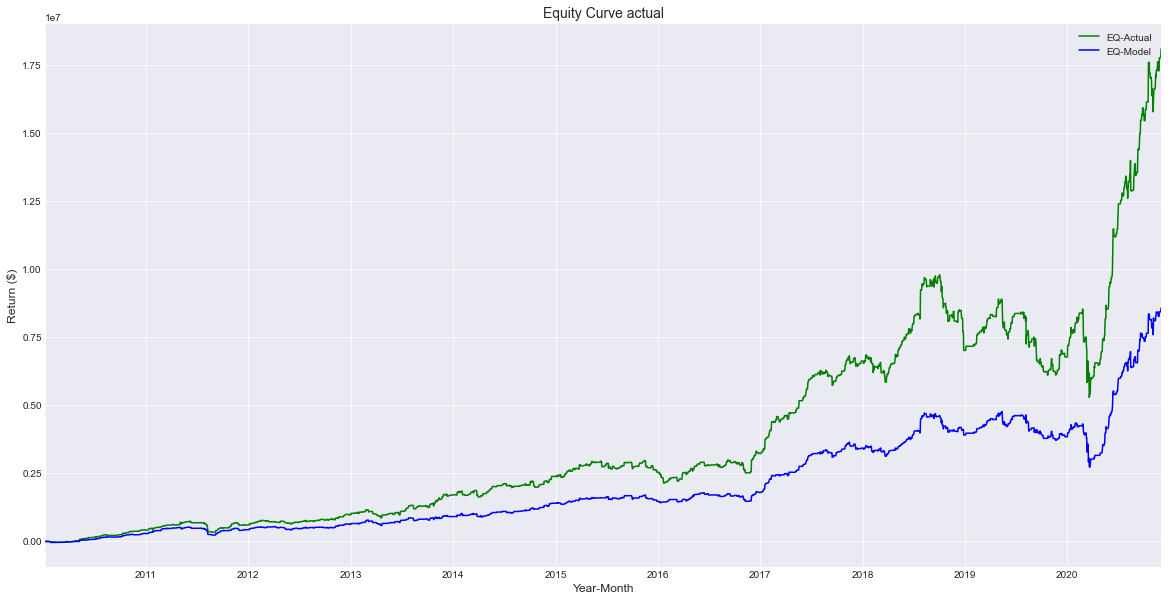

In [369]:
# Set the plot style
plt.style.use('seaborn-darkgrid')

# Plotting the close price column
equity_curve['EQ-Actual'].plot(figsize=(20, 10), color='green')
equity_curve['EQ-Model'].plot(figsize=(20, 10), color='blue')
# Setting the graph title
plt.title("Equity Curve actual", fontsize=14)
# Setting the x-axis title
plt.xlabel('Year-Month', fontsize=12)
# Setting the y-axis title
plt.ylabel('Return ($)', fontsize=12)
#add legend
plt.legend()
# Function for showing graph
plt.show()

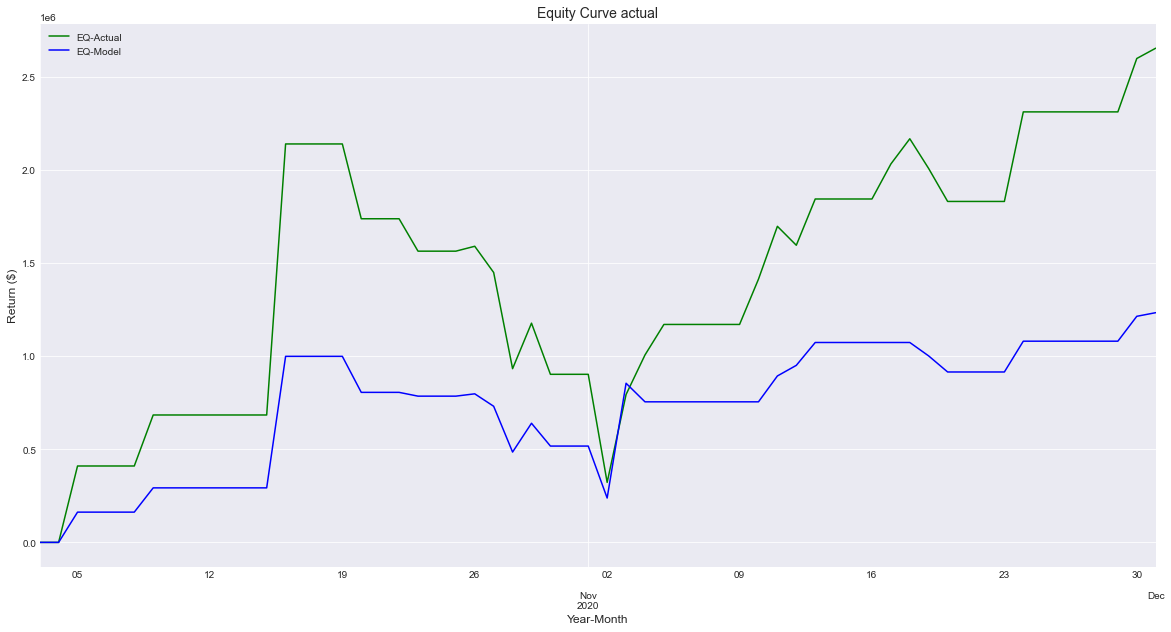

In [370]:
#zoom in to last 60 days
last_60= equity_curve.iloc[-60:].copy()

#build new equity curve starting from 60 days back
last_60['EQ-Actual'] = last_60['Profit'].cumsum(axis=0)
last_60['EQ-Model'] = last_60['ProfitM'].cumsum(axis=0)

# Set the plot style
plt.style.use('seaborn-darkgrid')

# Plotting the close price column
last_60['EQ-Actual'].plot(figsize=(20, 10), color='green')
last_60['EQ-Model'].plot(figsize=(20, 10), color='blue')
# Setting the graph title
plt.title("Equity Curve actual", fontsize=14)
# Setting the x-axis title
plt.xlabel('Year-Month', fontsize=12)
# Setting the y-axis title
plt.ylabel('Return ($)', fontsize=12)
#add a legend
plt.legend()
# Function for showing graph
plt.show()